First method: FAISS embeddings

possibly provide a summary with llama as metadata in vectordb

https://engineering.fb.com/2017/03/29/data-infrastructure/faiss-a-library-for-efficient-similarity-search/


In [ ]:
!pip install langchain_community

In [ ]:
!pip install langchain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 817.7/817.7 kB 6.6 MB/s eta 0:00:00


In [ ]:
from langchain_community.document_loaders import DirectoryLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import HuggingFaceEmbeddings

In [ ]:
!pip install unstructured

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.8/433.8 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.7/274.7 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 21.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 29.8 MB/s eta 0:00:00
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=b6b8d4dc2e1210deb574c7b249a0d92711b30ac272f454ebbc738e12615bfca7
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
loader = DirectoryLoader("/content/drive/MyDrive/Paper Abstracts", glob="**/*.txt", show_progress=True, use_multithreading=True)
documents  = loader.load()
print(f"num of documents loaded: {len(documents)}")

text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=0)
docs = text_splitter.split_documents(documents)

#vectordb = Chroma.from_documents(documents=docs, embedding=HuggingFaceEmbeddings(), persist_directory="C:/Users/silviachen/Downloads/Paper Abstracts/chromadb")

100%|██████████| 751/751 [00:25<00:00, 29.24it/s]


num of documents loaded: 751


In [ ]:
!pip install nltk

In [ ]:
!pip install pypdf

  Using cached pypdf-4.2.0-py3-none-any.whl (290 kB)


In [ ]:
!pip install -U langchain-text-splitters

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.5/287.5 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.0/113.0 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.8/144.8 kB 11.2 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
      Successfully uninstalled packaging-24.0


In [ ]:
from langchain.document_loaders import TextLoader

loader = TextLoader("/content/phil-textbook.txt")
documents = loader.load()
text_splitter = CharacterTextSplitter(chunk_size=4000, chunk_overlap=0)
docs = text_splitter.split_documents(documents)

In [ ]:
from langchain_community.document_loaders import PyPDFLoader

loader = PyPDFLoader("/content/2304.08485.pdf")
pages = loader.load_and_split()

In [ ]:
pages[0].page_content

'Visual Instruction Tuning\nHaotian Liu1∗, Chunyuan Li2∗, Qingyang Wu3, Yong Jae Lee1\n1University of Wisconsin–Madison2Microsoft Research3Columbia University\nhttps://llava-vl.github.io\nAbstract\nInstruction tuning large language models (LLMs) using machine-generated\ninstruction-following data has been shown to improve zero-shot capabilities on\nnew tasks, but the idea is less explored in the multimodal field. We present the\nfirst attempt to use language-only GPT-4 to generate multimodal language-image\ninstruction-following data. By instruction tuning on such generated data, we in-\ntroduce LLaV A: Large Language andVision Assistant, an end-to-end trained\nlarge multimodal model that connects a vision encoder and an LLM for general-\npurpose visual and language understanding. To facilitate future research on visual\ninstruction following, we construct two evaluation benchmarks with diverse and\nchallenging application-oriented tasks. Our experiments show that LLaV A demon-\nstrate

In [ ]:
pages[1].page_content

'utilize various machine-generated high-quality instruction-following samples to improve the LLM’s\nalignment ability, reporting impressive performance compared with proprietary LLMs. Importantly,\nthis line of work is text-only .\nIn this paper, we present visual instruction-tuning , the first attempt to extend instruction-tuning to\nthe language-image multimodal space, to pave the way towards building a general-purpose visual\nassistant. In particular, our paper makes the following contributions:\n•Multimodal instruction-following data . One key challenge is the lack of vision-language\ninstruction-following data. We present a data reformation perspective and pipeline to convert\nimage-text pairs into an appropriate instruction-following format, using ChatGPT/GPT-4.\n•Large multimodal models . We develop a large multimodal model (LMM), by connecting the\nopen-set visual encoder of CLIP [ 40] with the language decoder Vicuna [ 9], and fine-tuning\nend-to-end on our generated instructi

In [ ]:
cot_string = pages[1].page_content.replace("\n", " ")
cot_string

'utilize various machine-generated high-quality instruction-following samples to improve the LLM’s alignment ability, reporting impressive performance compared with proprietary LLMs. Importantly, this line of work is text-only . In this paper, we present visual instruction-tuning , the first attempt to extend instruction-tuning to the language-image multimodal space, to pave the way towards building a general-purpose visual assistant. In particular, our paper makes the following contributions: •Multimodal instruction-following data . One key challenge is the lack of vision-language instruction-following data. We present a data reformation perspective and pipeline to convert image-text pairs into an appropriate instruction-following format, using ChatGPT/GPT-4. •Large multimodal models . We develop a large multimodal model (LMM), by connecting the open-set visual encoder of CLIP [ 40] with the language decoder Vicuna [ 9], and fine-tuning end-to-end on our generated instructional vision

In [ ]:
from langchain.vectorstores import FAISS
from langchain.embeddings import HuggingFaceBgeEmbeddings

In [ ]:
model_name = "BAAI/bge-large-en-v1.5"
model_kwargs = {'device': 'cuda'}
encode_kwargs = {'normalize_embeddings': True}

In [ ]:
model = HuggingFaceBgeEmbeddings(
    model_name=model_name,
    model_kwargs=model_kwargs,
    encode_kwargs=encode_kwargs,
    query_instruction="Represent this sentence for searching relevant passages:"
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/94.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/779 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

In [ ]:
db = FAISS.from_documents(docs, model) # alternate:embeddings
db.save_local("faiss_index")

In [ ]:
db = FAISS.load_local("/faiss_index", query_embedding)
retriever=db.as_retriever(search_type="mmr", search_kwargs = {
      'k': 2
    })
context = retriever.get_relevant_documents(questions)

second: ChromaDB with sentence-transformers

performances details: https://www.sbert.net/docs/pretrained_models.html

other models to be evaluated with different criteria

In [ ]:
!pip install chromadb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 525.5/525.5 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.9/91.9 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 36.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 61.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.1/106.1 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 9.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 698.9/698.9 kB 4

In [ ]:
import re, nltk
nltk.download('punkt')

In [ ]:
!pip install chromadb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.8/526.8 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.1/106.1 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 10.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 698.9/698.9 kB 51.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 M

In [ ]:
from chromadb.utils import embedding_functions
import chromadb

In [ ]:
!pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 4.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
sentence_transformer_ef = embedding_functions.SentenceTransformerEmbeddingFunction(model_name="all-mpnet-base-v2")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
from datasets import load_dataset
dataset = load_dataset("csv", data_files="13k-recipes.csv",keep_default_na=False )

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
dataset['train'][1]

{'Unnamed: 0': 1,
 'Title': 'Crispy Salt and Pepper Potatoes',
 'Ingredients': "['2 large egg whites', '1 pound new potatoes (about 1 inch in diameter)', '2 teaspoons kosher salt', '¾ teaspoon finely ground black pepper', '1 teaspoon finely chopped rosemary', '1 teaspoon finely chopped thyme', '1 teaspoon finely chopped parsley']",
 'Instructions': 'Preheat oven to 400°F and line a rimmed baking sheet with parchment. In a large bowl, whisk the egg whites until foamy (there shouldn’t be any liquid whites in the bowl). Add the potatoes and toss until they’re well coated with the egg whites, then transfer to a strainer or colander and let the excess whites drain. Season the potatoes with the salt, pepper, and herbs. Scatter the potatoes on the baking sheet (make sure they’re not touching) and roast until the potatoes are very crispy and tender when poked with a knife, 15 to 20 minutes (depending on the size of the potatoes).\nTransfer to a bowl and serve.',
 'Image_Name': 'crispy-salt-and

In [ ]:
df

,",Title,Ingredients,Instructions,Image_Name,Cleaned_Ingredients"
0,"0,Miso-Butter Roast Chicken With Acorn Squash ..."
1,"Meanwhile, halve squash and scoop out seeds. R..."
2,"Combine sage, rosemary, and 6 Tbsp. melted but..."
3,"Add bread, apples, oil, and Â¼ tsp. salt to re..."
4,Place onion and vinegar in a small bowl; seaso...
...,...
58777,Spread 1/4 cup tomato sauce over bottom of cas...
58778,"Cover chiles with remaining tomato sauce, spre..."
58779,"Bake lasagne, covered with foil, in middle of ..."
58780,Preheat broiler. Remove foil and broil about 3...


In [ ]:
def perform_search(query,count, k):

    #load_csv here

    chroma_client = chromadb.PersistentClient(path="/content/drive/MyDrive/persistent_db") #see if the chromaDB has already been created

    if count == 1:
        context = chroma_client.create_collection(name="context11", embedding_function=sentence_transformer_ef)
        context.add(
            ids=[str(i) for i in range(0, 100)],  # IDs are just strings
            documents=[dataset['train'][i]['Cleaned_Ingredients'] for i in range(0, 100)
    ],
            metadatas=[{'Instructions':dataset['train'][i]['Instructions']} for i in range(0, 100)
    ],
)
    else:
        context = chroma_client.get_collection(name="context11", embedding_function=sentence_transformer_ef) #if the vectorstore already exist

    results = context.query(
    query_texts=query,
    n_results=k
    )
    return results['metadatas']

In [ ]:
context = perform_search("potato", 2, 1)# change from 6000 to 1000
context[0][0]["Instructions"]

'Cover potatoes, garlic, and 1 Tbsp. salt with cold water in a large pot. Bring to a low boil, then reduce heat and simmer (do not boil) until potatoes are very tender when pierced with the tip of a paring knife but not falling apart, 20–25 minutes.\nMeanwhile, heat milk, thyme, and 3/4 cup butter in a small pot over medium, stirring, until butter is melted. Remove from heat; set aside.\nDrain potatoes and garlic; return to pot. Toss over low heat until moisture evaporates, 1–2 minutes. Using potato ricer or food mill, immediately press potatoes and garlic into a large bowl (do not let cool).\nDiscard thyme from milk mixture and gradually stir into potatoes, reserving about 1/2 cup if you plan to make in advance (see Do Ahead). Season with 2 tsp. salt and 3/4 tsp. pepper. Fold in sour cream and stir with a spoon until incorporated and very smooth (do not overmix or potatoes will become gummy). Taste and adjust seasonings. Serve topped with remaining 2 Tbsp. butter and more pepper.\nMas

In [ ]:
def perform_search(query,count, k):

    #load_csv here

    chroma_client = chromadb.PersistentClient(path="/content/drive/MyDrive/persistent_db") #see if the chromaDB has already been created

    if count == 1:
        context = chroma_client.create_collection(name="context5", embedding_function=sentence_transformer_ef)
        context.add(
            ids=[str(i) for i in range(0, 1868)],  # IDs are just strings
            documents=[docs[i].page_content for i in range(0, 1868)
    ],
            metadatas=[{"source": docs[i].metadata['source']} for i in range(0, 1868)
    ],
)
    else:
        context = chroma_client.get_collection(name="context5", embedding_function=sentence_transformer_ef) #if the vectorstore already exist

    results = context.query(
    query_texts=query,
    n_results=k
    )
    return results


In [ ]:
p = perform_search("machine learning", 2, 200)
threshold = 2
p["distances"]
index = len([score for score in p["distances"][0] if score < threshold])
print(p["documents"][0][:index]) # we can see how many documents are retrieved for a specific threshold

['algorithm.', 'classification accuracy up to 77%.', 'self-supervised learning models.', "The rapid development in data collecting devices and computation platforms produces an emerging number of agents, each equipped with a unique data modality over a particular population of subjects. While an agent's predictive performance may be enhanced by transmitting others' data to it, this is often unrealistic due to intractable transmission costs and security concerns. In this paper, we propose a method named ASCII for an agent to improve its classification performance through assistance", 'proposed algorithm.', 'classifier, using supervised learning. Only 20% of the data needs to be manually annotated with the proposed method, to achieve the accuracy with all the data annotated. In addition, the proposed method clearly outperforms other active learning algorithms proposed for sound event classification through all the experiments, simulating varying fraction of data that is manually labeled.

1. some texts are cut into a single word by chunk textSplitter, would it be better to read in a whole abstract as a doc to perform vector similarity search? We are reading from the full source but not querying with full source abstract vectorized 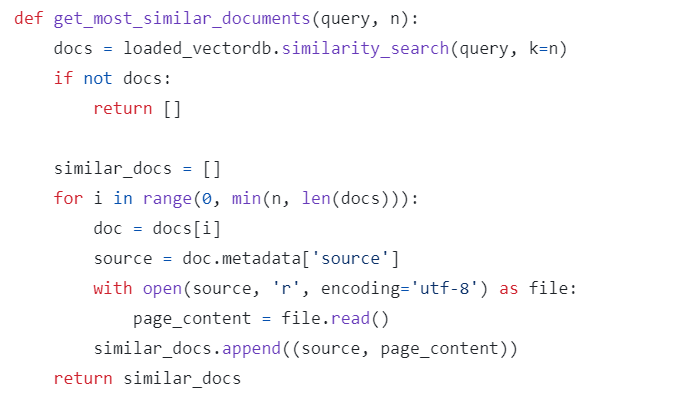

text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=0)
docs = text_splitter.split_documents(documents)

2. determine the best distance as searching threshold

3. generate tags for further search? how are we going to get the head title for the paper abstract? by source name?

4. would it be better to use open source models to save some cost?